In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_excel("houseprizeods.xlsx")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,area,price
0,NaN,NaN,NaN,2600,550000
1,NaN,NaN,NaN,3000,565000
2,NaN,NaN,NaN,3200,610000
3,NaN,NaN,NaN,3600,680000
4,NaN,NaN,NaN,4000,725000


In [9]:
df=df.drop(["Unnamed: 0","Unnamed: 1","Unnamed: 2"],axis=1)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


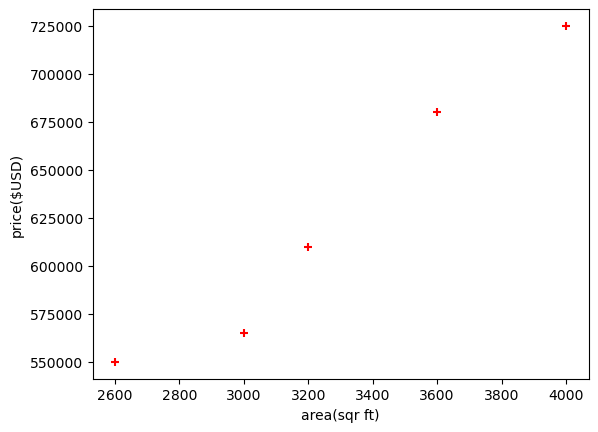

In [14]:
plt.xlabel("area(sqr ft)")
plt.ylabel("price($USD)")
plt.scatter(df.area,df.price,color="red",marker="+")

In [15]:
reg=linear_model.LinearRegression()
reg.fit(df[["area"]],df.price)

LinearRegression()

In [24]:
reg.predict([[3200]])

array([615136.98630137])

In [25]:
reg.coef_  #This is oue M(slope)

array([135.78767123])

In [26]:
reg.intercept_ #This is your our B(C,Intecept)

180616.43835616432

In [28]:
pred=(135.78767123*3200+180616.43835616432)

In [40]:
pred

615136.9862921643

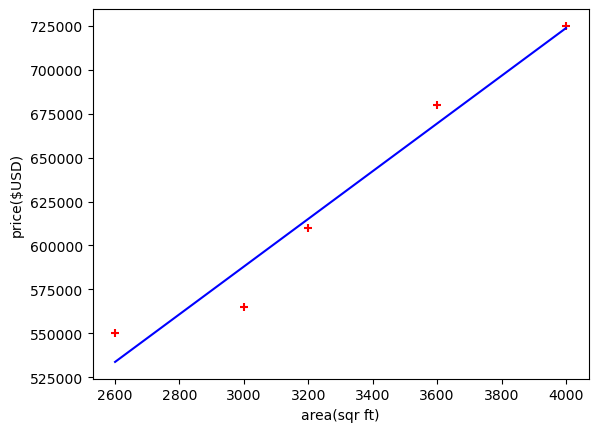

In [43]:
plt.xlabel("area(sqr ft)")
plt.ylabel("price($USD)")
plt.scatter(df.area,df.price,color="red",marker="+")
plt.plot(df.area,reg.predict(df[['area']]),color="blue")

In [31]:
d=pd.read_excel("area.xlsx")

In [32]:
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [34]:
p=reg.predict(d)

In [37]:
d['prices']=p
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [39]:
d.to_csv("prediction.csv",index=False)